Replaced 6 points 
Replaced 7 points 


<IPython.core.display.Javascript object>


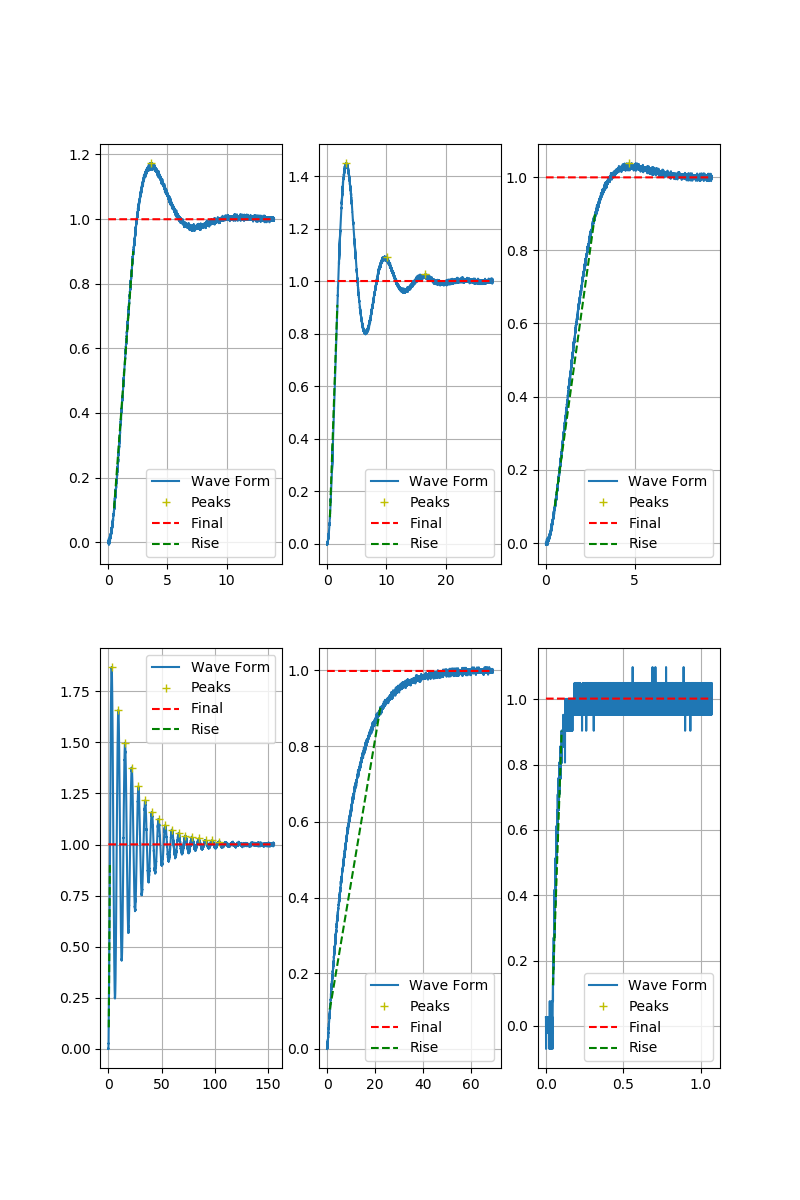

0.9992856234596422
1.000168344429208
0.9993153561818623
1.0008360736194206
0.9986960361516825
1.002331661011887


In [2]:
from tektronix import tektronix
from scipy import signal, fftpack, special
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use("webagg")
import matplotlib.pyplot as plt
from pathlib import Path
from copy import deepcopy


%matplotlib notebook

crit = tektronix.fake(signal.lti([1], [1, 1, 1]))
crit.set_index("float")

under = tektronix.fake(signal.lti([1], [1, 0.5, 1]))
under.set_index("float")

over = tektronix.fake(signal.lti([1], [1, 1.5, 1]))
over.set_index("float")

way_under = tektronix.fake(signal.lti([1], [1, 0.09, 1]))
way_under.set_index("float")

way_over = tektronix.fake(signal.lti([1], [1, 10, 1]))
way_over.set_index("float")


real_in,_  = tektronix.load("165532_input.csv")
real_in.set_index("float")
real_out,_  = tektronix.load("165532_output.csv")
real_out.set_index("float")


real_in.clean_step(sigma=6.0, window=1000)
real_out.clean_step(sigma=6.0, window=1000)

real_in.series = real_in.series[real_in.series.columns[0]]
real_out.series = real_out.series[real_out.series.columns[0]]

fig, ((ax1, ax2 ,ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8,12))

real_out.sigmoid_normalize(inplace=True)
#real_out.series.plot(ax=ax6)
#plt.plot(series.index, nfit)

crit.plot_analysis(ax1)
under.plot_analysis(ax2)
over.plot_analysis(ax3)
way_under.plot_analysis(ax4)
way_over.plot_analysis(ax5)
real_out.plot_analysis(ax6)

<IPython.core.display.Javascript object>


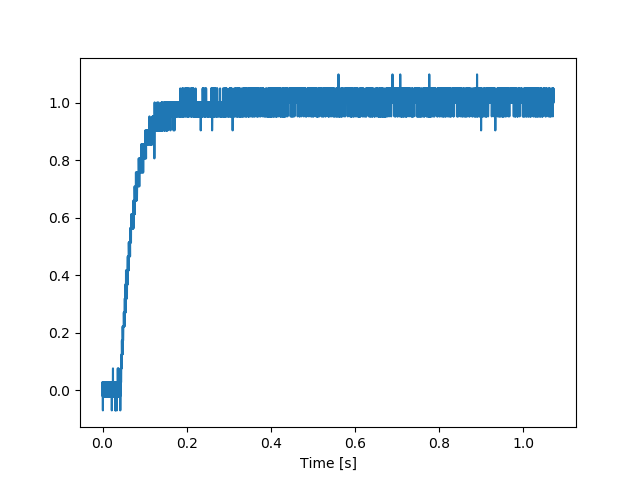

In [4]:
real_out.series.plot()

In [4]:
type(under.series)

pandas.core.series.Series

$e^{i\pi} + 1 = 0$
